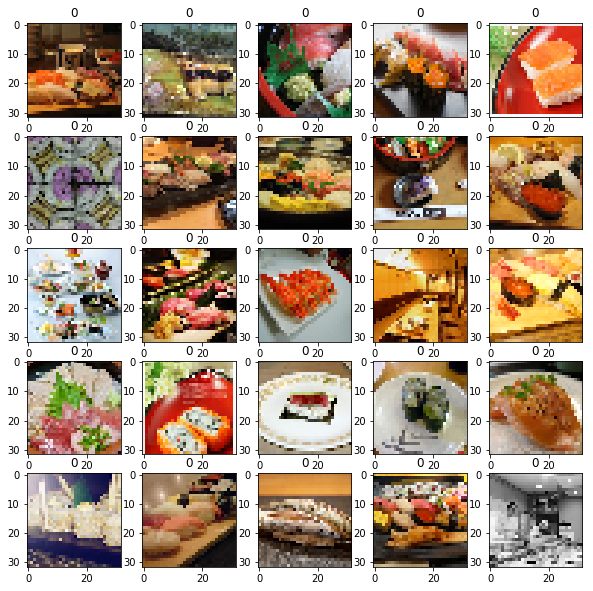

In [4]:
import matplotlib.pyplot as plt
# 写真データを読み込み
photos = np.load('image/photos.npz')
x = photos['x']
y = photos['y']
# 開始インデックス --- (*1)
idx = 0
# pyplotで出力
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(x[i + idx])
    plt.title(y[i + idx])
plt.show()

In [6]:
import cnn_model
import keras
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
import keras

# 入力と出力を指定
im_rows = 32 # 画像の縦ピクセルサイズ
im_cols = 32 # 画像の横ピクセルサイズ
im_color = 3 # 画像の色空間
in_shape = (im_rows, im_cols, im_color)
nb_classes = 3

# 写真データを読み込み
photos = np.load('image/photos.npz')
x = photos['x']
y = photos['y']

# 読み込んだデータをの三次元配列に変換
x = x.reshape(-1, im_rows, im_cols, im_color)
x = x.astype('float32') / 255
# ラベルデータをone-hotベクトルに直す
y = keras.utils.np_utils.to_categorical(y.astype('int32'), nb_classes)

# 学習用とテスト用に分ける
x_train, x_test, y_train, y_test = train_test_split(
    x, y, train_size=0.8)

# CNNモデルを取得
model = cnn_model.get_model(in_shape, nb_classes)

# 学習を実行
hist = model.fit(x_train, y_train,
          batch_size=32,
          epochs=20,
          verbose=1,
          validation_data=(x_test, y_test))

# モデルを評価
score = model.evaluate(x_test, y_test, verbose=1)
print('正解率=', score[1], 'loss=', score[0])


Epoch 1/20
8/8 [==============================] - 1s 161ms/step - loss: 1.1237 - accuracy: 0.3792 - val_loss: 1.0806 - val_accuracy: 0.4000
Epoch 2/20
8/8 [==============================] - 1s 102ms/step - loss: 1.0950 - accuracy: 0.3958 - val_loss: 1.1221 - val_accuracy: 0.2667
Epoch 3/20
8/8 [==============================] - 1s 100ms/step - loss: 1.0844 - accuracy: 0.4042 - val_loss: 1.0219 - val_accuracy: 0.4833
Epoch 4/20
8/8 [==============================] - 1s 100ms/step - loss: 1.0442 - accuracy: 0.4708 - val_loss: 1.0696 - val_accuracy: 0.4333
Epoch 5/20
8/8 [==============================] - 1s 98ms/step - loss: 1.0284 - accuracy: 0.4917 - val_loss: 0.9794 - val_accuracy: 0.5000
Epoch 6/20
8/8 [==============================] - 1s 110ms/step - loss: 0.9805 - accuracy: 0.5333 - val_loss: 1.0401 - val_accuracy: 0.4333
Epoch 7/20
8/8 [==============================] - 1s 101ms/step - loss: 0.9370 - accuracy: 0.5542 - val_loss: 0.9104 - val_accuracy: 0.5167
Epoch 8/20
8/8 [=====

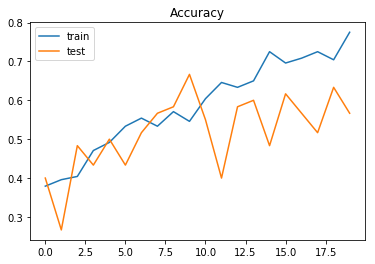

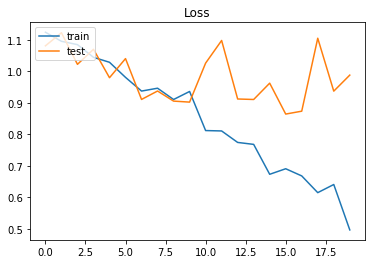

In [8]:
# 学習の様子をグラフへ描画
# 正解率の推移をプロット
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Accuracy')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# ロスの推移をプロット
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [11]:
model.save_weights('./image/photos_model_CNN.h5')

In [17]:
# CNNでMNISTの分類問題に挑戦
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import RMSprop
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

# 入力と出力を指定 --- (*1)
im_rows = 32 # 画像の縦ピクセルサイズ
im_cols = 32 # 画像の横ピクセルサイズ
im_color = 3 # 画像の色空間
in_shape = (im_rows, im_cols, im_color)
nb_classes = 3

# 写真データを読み込み --- (*2)
photos = np.load('image/photos.npz')
x = photos['x']
y = photos['y']

# 読み込んだデータをの三次元配列に変換 --- (*3)
x = x.reshape(-1, im_rows, im_cols, im_color)
x = x.astype('float32') / 255
# ラベルデータをone-hotベクトルに直す --- (*4)
y = keras.utils.np_utils.to_categorical(y.astype('int32'), nb_classes)

# 学習用とテスト用に分ける --- (*5)
x_train, x_test, y_train, y_test = train_test_split(
    x, y, train_size=0.8)

# CNNモデル構造を定義 --- (*6)
model = Sequential()
model.add(Conv2D(32,
          kernel_size=(3, 3),
          activation='relu',
          input_shape=in_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(nb_classes, activation='softmax'))

# モデルをコンパイル --- (*7)
model.compile(
    loss='categorical_crossentropy',
    optimizer=RMSprop(),
    metrics=['accuracy'])

# 学習を実行 --- (*8)
hist = model.fit(x_train, y_train,
          batch_size=32,
          epochs=20,
          verbose=1,
          validation_data=(x_test, y_test))

# モデルを評価 --- (*9)
score = model.evaluate(x_test, y_test, verbose=1)
print('正解率=', score[1], 'loss=', score[0])


Epoch 1/20
8/8 [==============================] - 1s 126ms/step - loss: 1.6837 - accuracy: 0.3417 - val_loss: 1.0903 - val_accuracy: 0.3000
Epoch 2/20
8/8 [==============================] - 1s 100ms/step - loss: 1.0814 - accuracy: 0.4542 - val_loss: 1.0403 - val_accuracy: 0.4000
Epoch 3/20
8/8 [==============================] - 1s 100ms/step - loss: 0.9825 - accuracy: 0.5667 - val_loss: 0.9686 - val_accuracy: 0.5833
Epoch 4/20
8/8 [==============================] - 1s 103ms/step - loss: 0.9162 - accuracy: 0.5875 - val_loss: 0.9703 - val_accuracy: 0.4667
Epoch 5/20
8/8 [==============================] - 1s 97ms/step - loss: 0.8859 - accuracy: 0.6208 - val_loss: 0.9484 - val_accuracy: 0.5333
Epoch 6/20
8/8 [==============================] - 1s 122ms/step - loss: 0.8285 - accuracy: 0.6708 - val_loss: 0.9919 - val_accuracy: 0.5167
Epoch 7/20
8/8 [==============================] - 1s 104ms/step - loss: 0.7040 - accuracy: 0.7250 - val_loss: 1.2954 - val_accuracy: 0.5000
Epoch 8/20
8/8 [=====

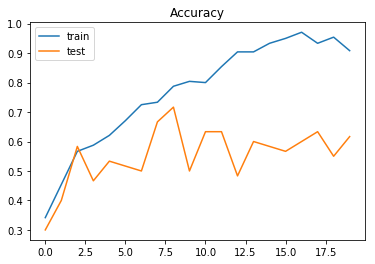

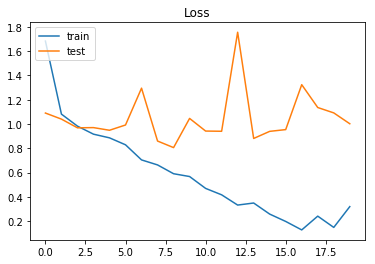

In [18]:
# 学習の様子をグラフへ描画 --- (*10)
# 正解率の推移をプロット
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Accuracy')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# ロスの推移をプロット
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [16]:
model.save_weights('./image/photos_model_CNN_mashi.h5')

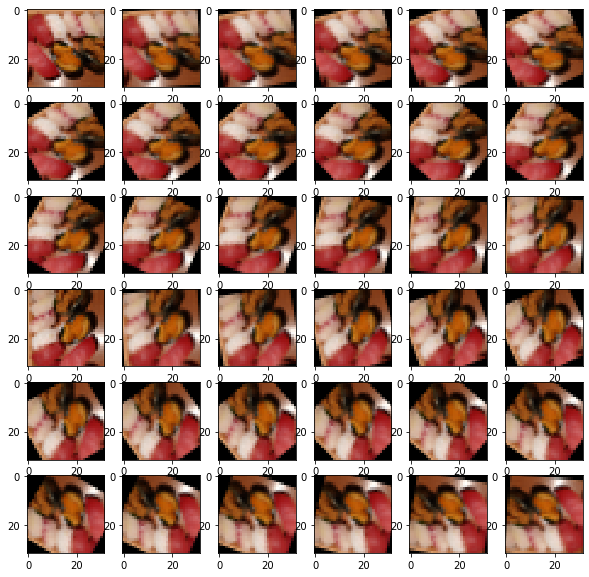

In [17]:

#水増しを行ってみる
import matplotlib.pyplot as plt
import cv2

# 写真データを読み込み
photos = np.load('image/photos.npz')
x = photos['x']
img = x[12] # 分かりやすい写真を選択

plt.figure(figsize=(10, 10))
for i in range(36):
    plt.subplot(6, 6, i+1)
    center = (16, 16)
    angle = i * 5 # 角度を変えて出力
    scale = 1
    mtx = cv2.getRotationMatrix2D(center, angle, scale)
    img2 = cv2.warpAffine(img, mtx, (32, 32))
    plt.imshow(img2)
plt.show()


In [15]:
# CNNでMNISTの分類問題に挑戦
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import RMSprop
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
import cv2

# 入力と出力を指定
im_rows = 32 # 画像の縦ピクセルサイズ
im_cols = 32 # 画像の横ピクセルサイズ
im_color = 3 # 画像の色空間
in_shape = (im_rows, im_cols, im_color)
nb_classes = 3

# 写真データを読み込み
photos = np.load('image/photos.npz')
x = photos['x']
y = photos['y']

# 読み込んだデータをの三次元配列に変換
x = x.reshape(-1, im_rows, im_cols, im_color)
x = x.astype('float32') / 255
# ラベルデータをone-hotベクトルに直す
y = keras.utils.np_utils.to_categorical(y.astype('int32'), nb_classes)

# 学習用とテスト用に分ける
x_train, x_test, y_train, y_test = train_test_split(
    x, y, train_size=0.8)

# 学習用データを水増しする
x_new = []
y_new = []
for i, xi in enumerate(x_train):
    yi = y_train[i]
    for ang in range(-30, 30, 5):
        # 回転させる --- (*2)
        center = (16, 16) # 回転の中心点
        mtx = cv2.getRotationMatrix2D(center, ang, 1.0)
        xi2 = cv2.warpAffine(xi, mtx, (32, 32))
        x_new.append(xi2)
        y_new.append(yi)
        # さらに左右反転させる --- (*3)
        xi3 = cv2.flip(xi2, 1)
        x_new.append(xi3)
        y_new.append(yi)        
        
# 水増しした画像を学習用に置き換える
print('水増し前=', len(y_train))
x_train = np.array(x_new)
y_train = np.array(y_new)
print('水増し後=', len(y_train))

# CNNモデル構造を定義 --- (*6)
model = Sequential()
model.add(Conv2D(32,
          kernel_size=(3, 3),
          activation='relu',
          input_shape=in_shape))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(nb_classes, activation='softmax'))

# モデルをコンパイル --- (*7)
model.compile(
    loss='categorical_crossentropy',
    optimizer=RMSprop(),
    metrics=['accuracy'])

# 学習を実行 --- (*8)
hist = model.fit(x_train, y_train,
          batch_size=64,
          epochs=7,
          verbose=1,
          validation_data=(x_test, y_test))

# モデルを評価 --- (*9)
score = model.evaluate(x_test, y_test, verbose=1)
print('正解率=', score[1], 'loss=', score[0])





水増し前= 240
水増し後= 5760
Epoch 1/7
90/90 [==============================] - 15s 171ms/step - loss: 0.9423 - accuracy: 0.5543 - val_loss: 0.7989 - val_accuracy: 0.7167
Epoch 2/7
90/90 [==============================] - 19s 206ms/step - loss: 0.6697 - accuracy: 0.7186 - val_loss: 0.9796 - val_accuracy: 0.6167
Epoch 3/7
90/90 [==============================] - 18s 197ms/step - loss: 0.5107 - accuracy: 0.7995 - val_loss: 1.3575 - val_accuracy: 0.6167
Epoch 4/7
90/90 [==============================] - 19s 206ms/step - loss: 0.3483 - accuracy: 0.8689 - val_loss: 1.6839 - val_accuracy: 0.6167
Epoch 5/7
90/90 [==============================] - 17s 190ms/step - loss: 0.2793 - accuracy: 0.8974 - val_loss: 1.5301 - val_accuracy: 0.6833
Epoch 6/7
90/90 [==============================] - 18s 202ms/step - loss: 0.1927 - accuracy: 0.9385 - val_loss: 1.6309 - val_accuracy: 0.6333
Epoch 7/7
2/2 [==============================] - 0s 11ms/step - loss: 1.9636 - accuracy: 0.6667
正解率= 0.6666666865348816 loss= 1

KeyError: 'acc'

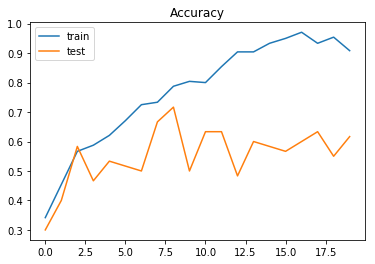

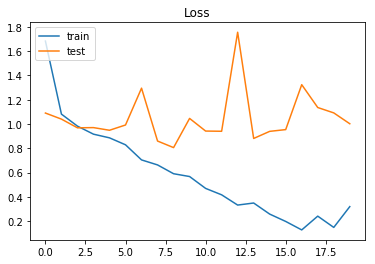

In [19]:
# 学習の様子をグラフへ描画 --- (*10)
# 正解率の推移をプロット
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Accuracy')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# ロスの推移をプロット
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [24]:
model.save_weights('./image/photos-model_CNN_mashi.h5')

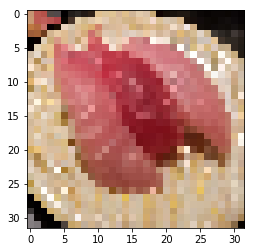

この写真は、 寿司 で、カロリーは 588 kcal
可能性は、 34 %


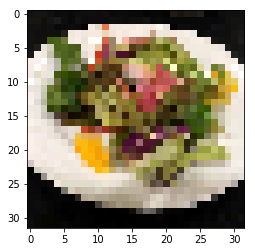

この写真は、 サラダ で、カロリーは 118 kcal
可能性は、 33 %


In [25]:
import cnn_model
import keras
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

target_image = "test-sushi.jpg"

im_rows = 32 # 画像の縦ピクセルサイズ
im_cols = 32 # 画像の横ピクセルサイズ
im_color = 3 # 画像の色空間
in_shape = (im_rows, im_cols, im_color)
nb_classes = 3

LABELS = ["寿司", "サラダ", "麻婆豆腐"]
CALORIES = [588, 118, 648]

# 保存したCNNモデルを読み込む
model = cnn_model.get_model(in_shape, nb_classes)
model.load_weights('./image/photos-model_CNN_mashi.h5')

def check_photo(path):
    # 画像を読み込む
    img = Image.open(path)
    img = img.convert("RGB") # 色空間をRGBに
    img = img.resize((im_cols, im_rows)) # サイズ変更
    plt.imshow(img)
    plt.show()
    # データに変換
    x = np.asarray(img)
    x = x.reshape(-1, im_rows, im_cols, im_color)
    x = x / 255

    # 予測
    pre = model.predict([x])[0]
    idx = pre.argmax()
    per = int(pre[idx] * 100)
    return (idx, per)

def check_photo_str(path):
    idx, per = check_photo(path)
    # 答えを表示
    print("この写真は、", LABELS[idx], "で、カロリーは", CALORIES[idx],"kcal")
    print("可能性は、", per, "%")

if __name__ == '__main__':
    check_photo_str('test-sushi.jpg')
    check_photo_str('test-salad.jpg')


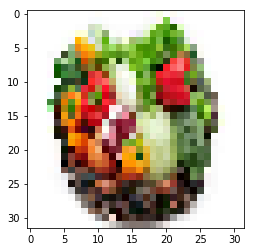

この写真は、 寿司 で、カロリーは 588 kcal
可能性は、 34 %


In [26]:
idx, per = check_photo("test.jpg")
# 答えを表示
print("この写真は、", LABELS[idx], "で、カロリーは", CALORIES[idx],"kcal")
print("可能性は、", per, "%")

